In [21]:
import pandas as pd
data = pd.read_csv('../environnement_data/gdp.csv', index_col=[0])
keep = [
 're_arabic_world',
 're_british_islands',
 're_central_europe',
 're_chinese_world',
 're_france',
 're_german_world',
 're_greek_world',
 're_indian_world',
 're_italy',
 're_japan',
 're_korea',
 're_low_countries',
 're_muslim_world',
 're_nordic_countries',
 're_ottoman_turkey',
 're_persian_world',
 're_portugal',
 're_southwestern_europe',
 're_spain',
 're_united_kingdom',
 're_western_europe']

data = data[data['region_code'].isin(keep)]
data = data[data['year']<=1800]
data = data[data['year']>=-800]

df_region = pd.read_csv('../environnement_data/region_code_region_name.csv')
df = pd.merge(data, df_region, on = 'region_code')


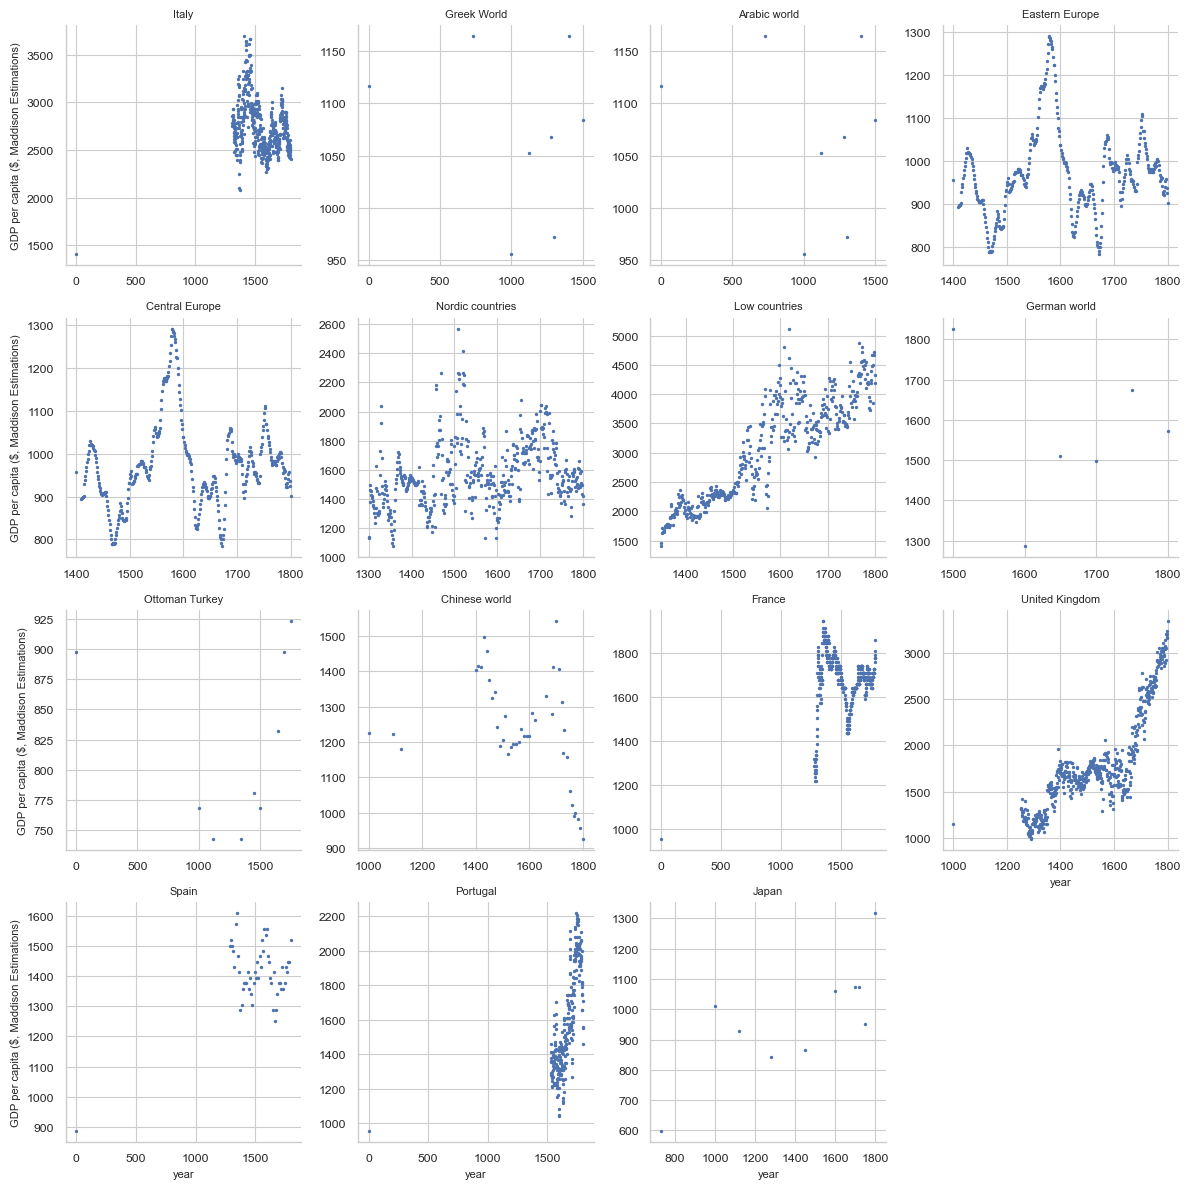

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Create a facet plot with one plot per region
g = sns.FacetGrid(df, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)
g = g.map(plt.scatter, "year", "gdp_per_capita", color='b', linewidth=1, s=2)

# Find the global minimum and maximum year
global_min_year = df["year"].min()
global_max_year = df["year"].max()

"""
# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)  # Set the x-axis limits
    ax.plot([global_min_year, global_max_year], [0, 0], color='k', linewidth=1)  # Timeline"""

# Set titles and save the figure
g.set_titles("{col_name}")
g.set_ylabels("GDP per capita ($, Maddison Estimations)")
plt.savefig("figures/environment/gdp_per_capita_in_time_per_region.png", dpi=300)

# Show the plot
plt.show()
